In [ ]:
#Построить 5 графиков по выбранным данным. Графики должны быть различных видов и использовать хотя бы 2
#из рассмотренных на занятии библиотек.

#Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель
#(например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно
#такой тип графика

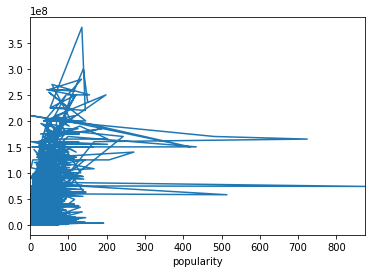

In [32]:
# 1.1 Линейная диаграмма: посмотреть корреляцию бюджета фильма и его оценки

import pandas as pd
import matplotlib.pyplot as plt

credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

movies.rename(columns= {'id':'movie_id'}, inplace=True)
movies=movies.merge(credits, on='movie_id')

movies['popularity'] = movies.popularity.astype('int64')
movies['budget'] = movies.budget.astype('int64')

movies.set_index('popularity')['budget'].plot()

# Как видно из графика, между суммой бюджета и оценкой фильма существуют положительная зависимость:
# чем больше бюджет фильма, тем выше рейтинг (за исключением нескольких выбросов)

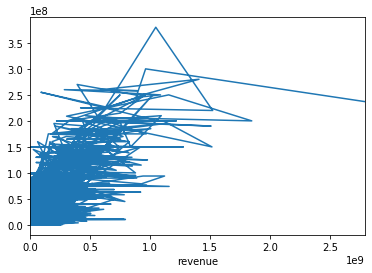

In [4]:
# 1.2 Линейная диаграмма: посмотреть корреляцию бюджета фильма и дохода от фильма

import pandas as pd
import matplotlib.pyplot as plt

credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

movies.rename(columns= {'id':'movie_id'}, inplace=True)
movies=movies.merge(credits, on='movie_id')

movies.set_index('revenue')['budget'].plot()

# Как видно из графика, между суммой бюджета и суммой дохода от фильма существуют положительная зависимость:
# чем больше бюджет фильма, тем выше доход (за исключением нескольких выбросов)

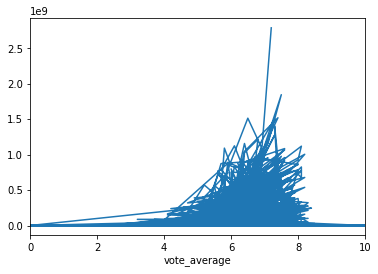

In [39]:
# 1.2 Линейная диаграмма: посмотреть корреляцию оценки зрителей и дохода от фильма

import pandas as pd
import matplotlib.pyplot as plt

credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

movies.rename(columns= {'id':'movie_id'}, inplace=True)
movies=movies.merge(credits, on='movie_id')

movies.set_index('vote_average')['revenue'].plot()

# Как видно из графика, между оценкой зрителей и суммой дохода от фильма не существует очевидной зависимости

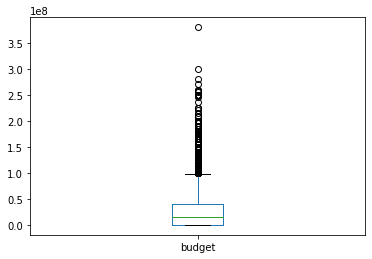

In [33]:
# 2. График распределения размера бюджета фильмов

import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('tmdb_5000_movies.csv')

movies['budget'] = movies.budget.astype('int64')

movies['budget'].plot(kind='box')

# Box plot график показывает следующие особенности распределения бюджета фильмов:
# - 25% фильмов снимались с минимальным бюджетом близким к нулю
# - 50% (Q2 + Q3) снимались с бюджетом не более 50 млн.долл, а бюджет медианного фильма  - примерно 20 млн.долл
# - верхняя квартиль фильмов имеет большой размах по сумме бюдета - от 50 млн.долл до 100 млн.долл
# Так как на графике видно большое колиечство выбросов - делать выводы из графика Box plot нужно делать осторожно

<BarContainer object of 10 artists>

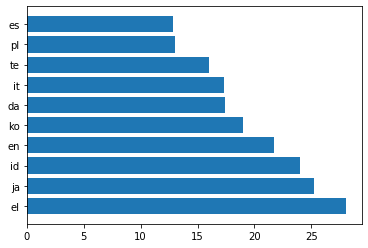

In [43]:
# 3. Средняя популярность фильмов по странам производителям

import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('tmdb_5000_movies.csv')

movies['popularity'] = movies.popularity.astype('int64')
movies['budget'] = movies.budget.astype('int64')

movies_grouped = movies.groupby('original_language').mean().reset_index()

movies_filtered = movies_grouped.sort_values('popularity', ascending=False).head(10)
plt.barh(movies_filtered['original_language'],movies_filtered['popularity'])

# Самый высокий рейтинг популярности у фильмов, снятых на испанском языке,
# вторыми по уровню рейтинга популярности являются немецкие фильма,
# на третьем месте по уровню рейтинга популярности - фильмы, снятые на английском языке

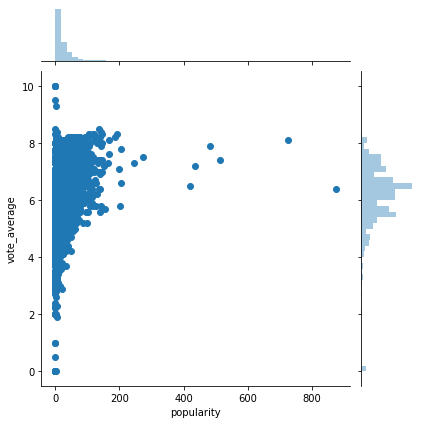

In [45]:
# 4.1 Определить взаимосвзяь между уровнем популярности ('popularity') и оценкой зрителей ('vote_average')
# и взаимосвязь между доходом и оценкрой зрителей

import pandas as pd
import seaborn as sns

movies = pd.read_csv('tmdb_5000_movies.csv')

sns.jointplot(x='popularity', y='vote_average', 
              data=movies, kind='scatter')

# Уровень популярности и уровень оценки зрителей совпадают

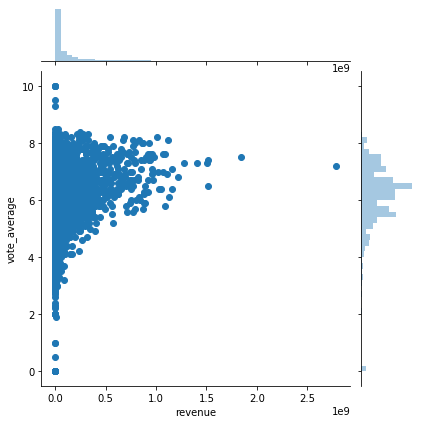

In [46]:
# 4.2 Определить взаимосвзяь между уровнем дохода ('revenue') и оценкой зрителей ('vote_average')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv('tmdb_5000_movies.csv')

sns.jointplot(x='revenue', y='vote_average', 
              data=movies, kind='scatter')

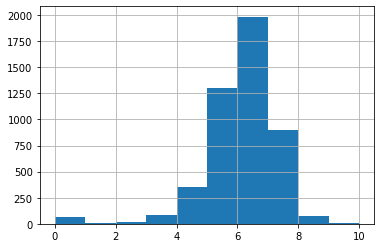

In [8]:
# 5.1 Распределение оценок зрителей

import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('tmdb_5000_movies.csv')

movies.vote_average.hist()

# как видно, по выборке фильмов, представленой в файле tmdb_5000_movies.csv, больше всего ставят средних оценок,
# оценок совсем хороших (ближе к 10) меньше, чем оценок совсем плохи (ближе к 0)

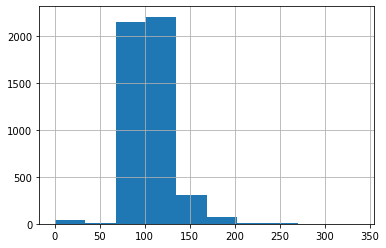

In [9]:
# 5.2 Распределение длинны фильмов

import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('tmdb_5000_movies.csv')

movies.runtime.hist()

# как видно, по выборке фильмов, представленой в файле tmdb_5000_movies.csv,
# фильмы снимаютв среднем длинной около 100 мин.

<BarContainer object of 5 artists>

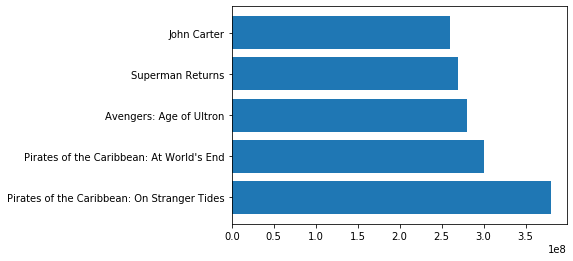

In [49]:
# 6.1 Пять самых дорогих фильмов 

import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('tmdb_5000_movies.csv')

movies['budget'] = movies.budget.astype('int64')

movies_budget = movies.sort_values('budget', ascending=False).head(5)
plt.barh(movies_budget['original_title'],movies_budget['budget'])

# Самыми дорогими фильмами были две части "Пираты карибского моря"

<BarContainer object of 5 artists>

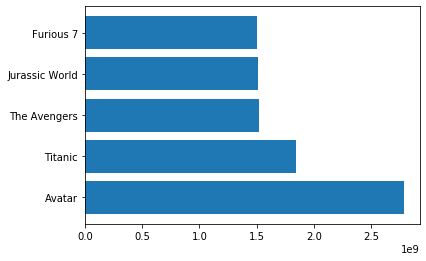

In [2]:
# 6.2 Пять самых доходных фильмов

import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('tmdb_5000_movies.csv')

movies['revenue'] = movies.revenue.astype('int64')

movies_revenue = movies.sort_values('revenue', ascending=False).head(5)
plt.barh(movies_revenue['original_title'], movies_revenue['revenue'])

# Самыми успешными (по доходу) фильмами были Аватар и Титаник